### Iris Dataset

In [2]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [5]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

In [7]:
cluster = [2, 3, 4, 5]
kmean_cluster = []

for i in cluster:
    kmean = KMeans(n_clusters=i, random_state=13)
    kmean_cluster.append(kmean.fit_predict(X_std))

<IPython.core.display.Javascript object>

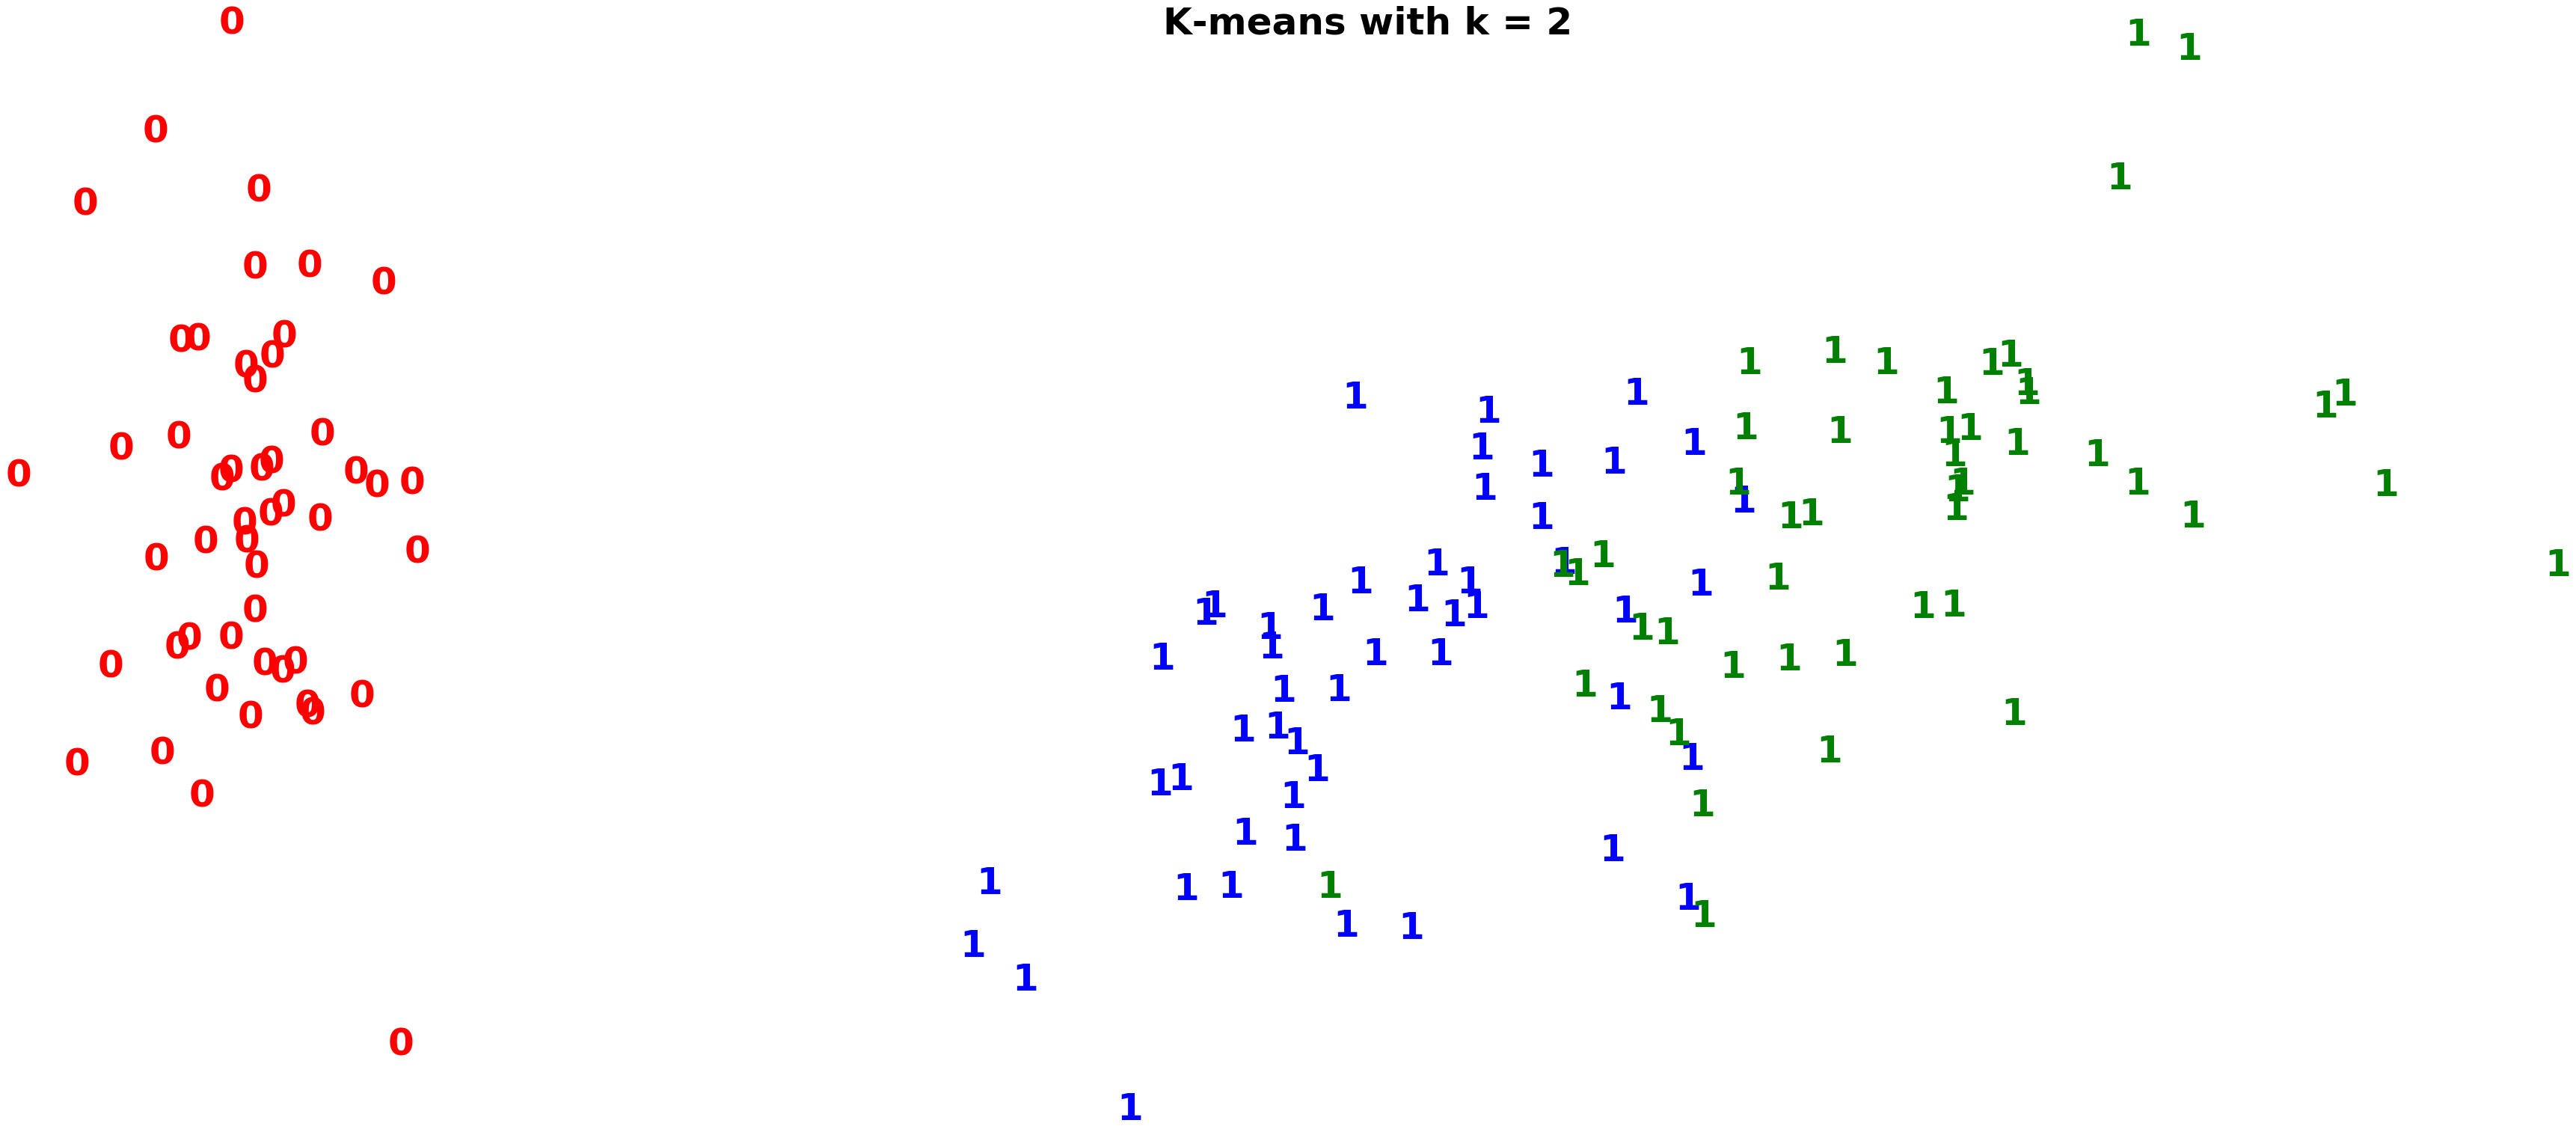

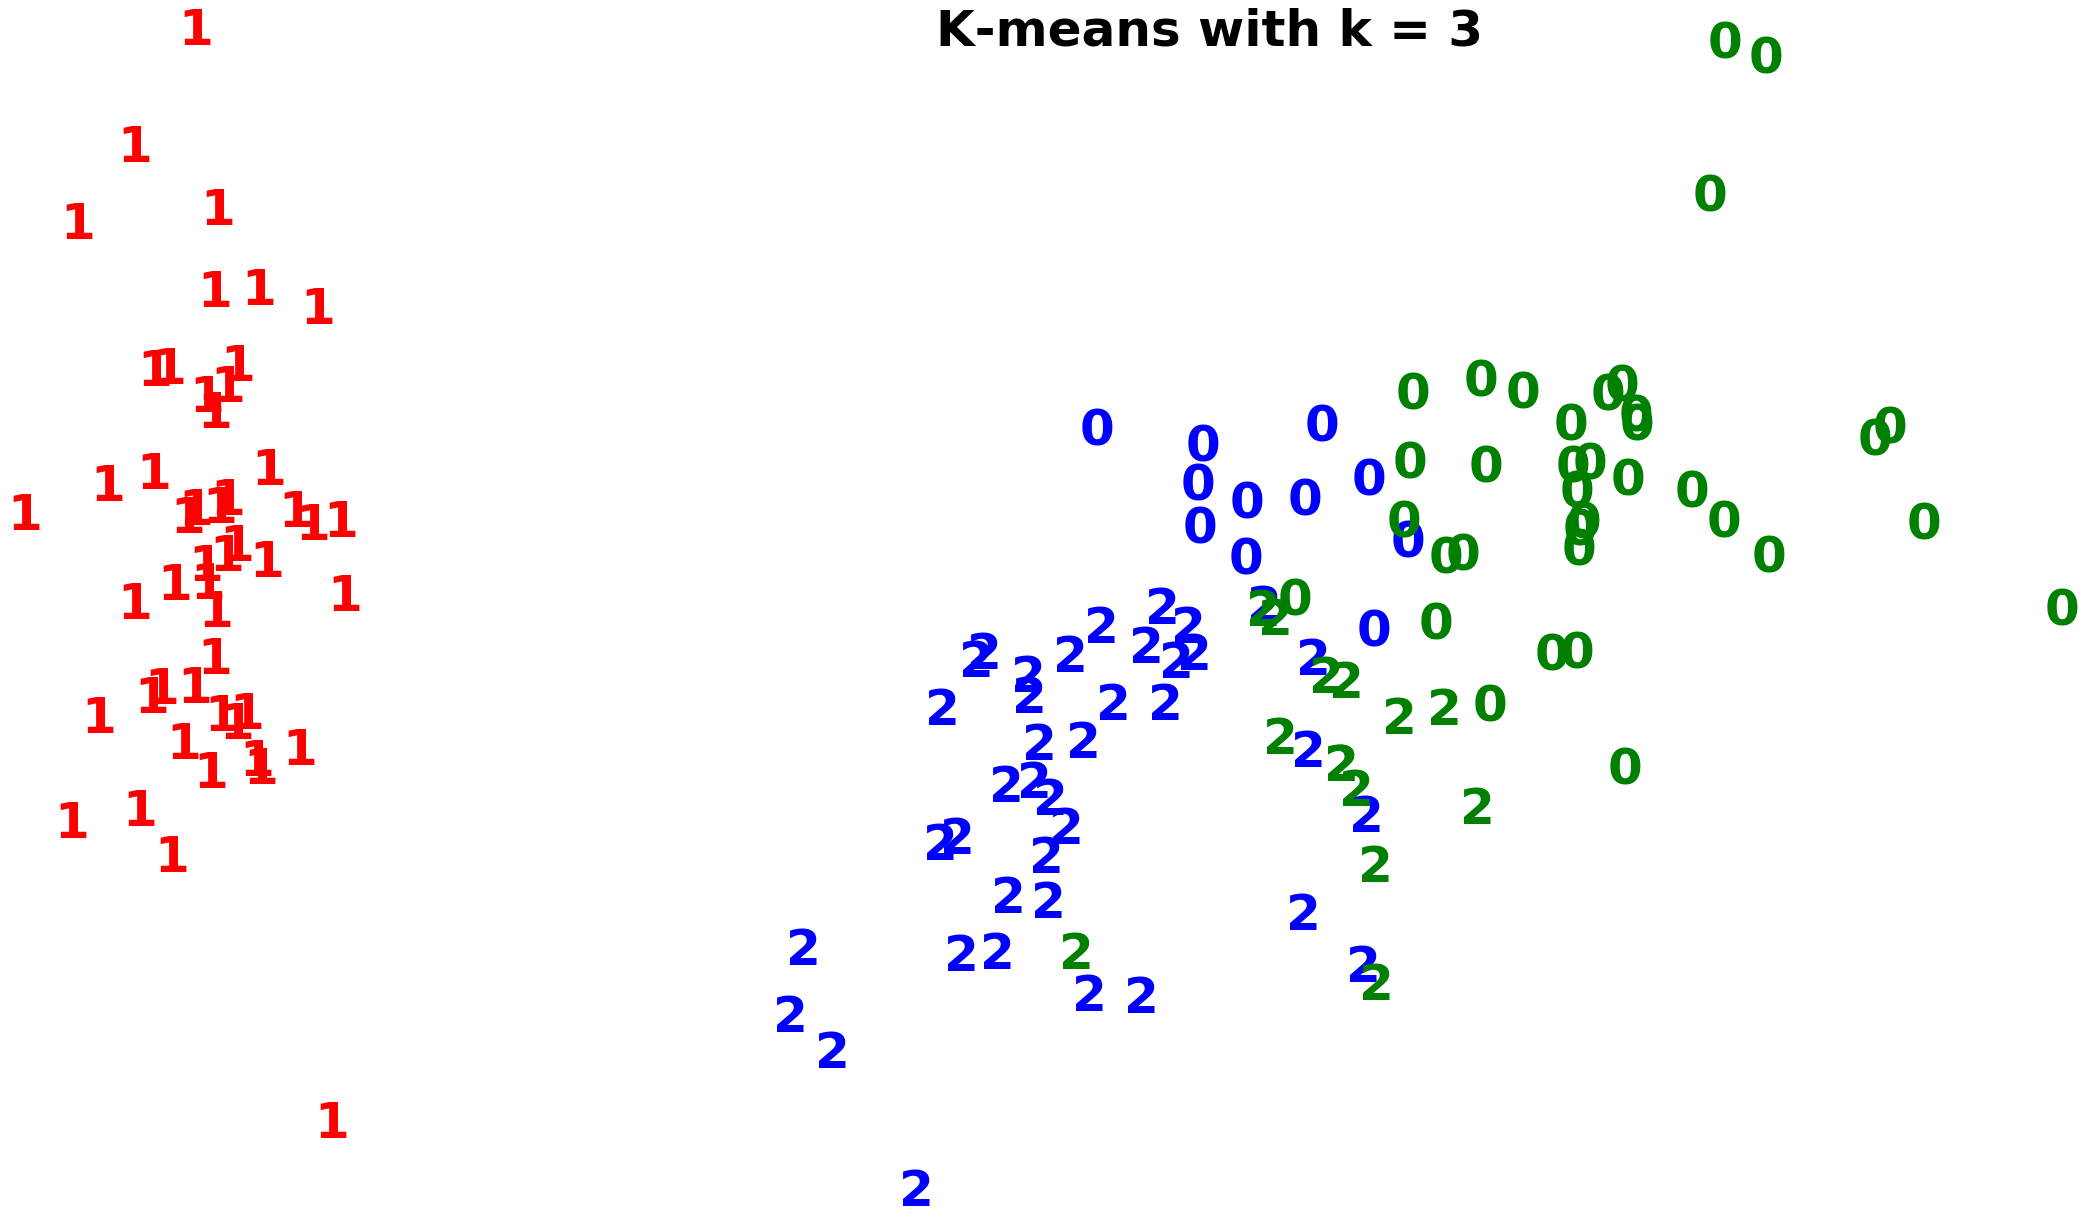

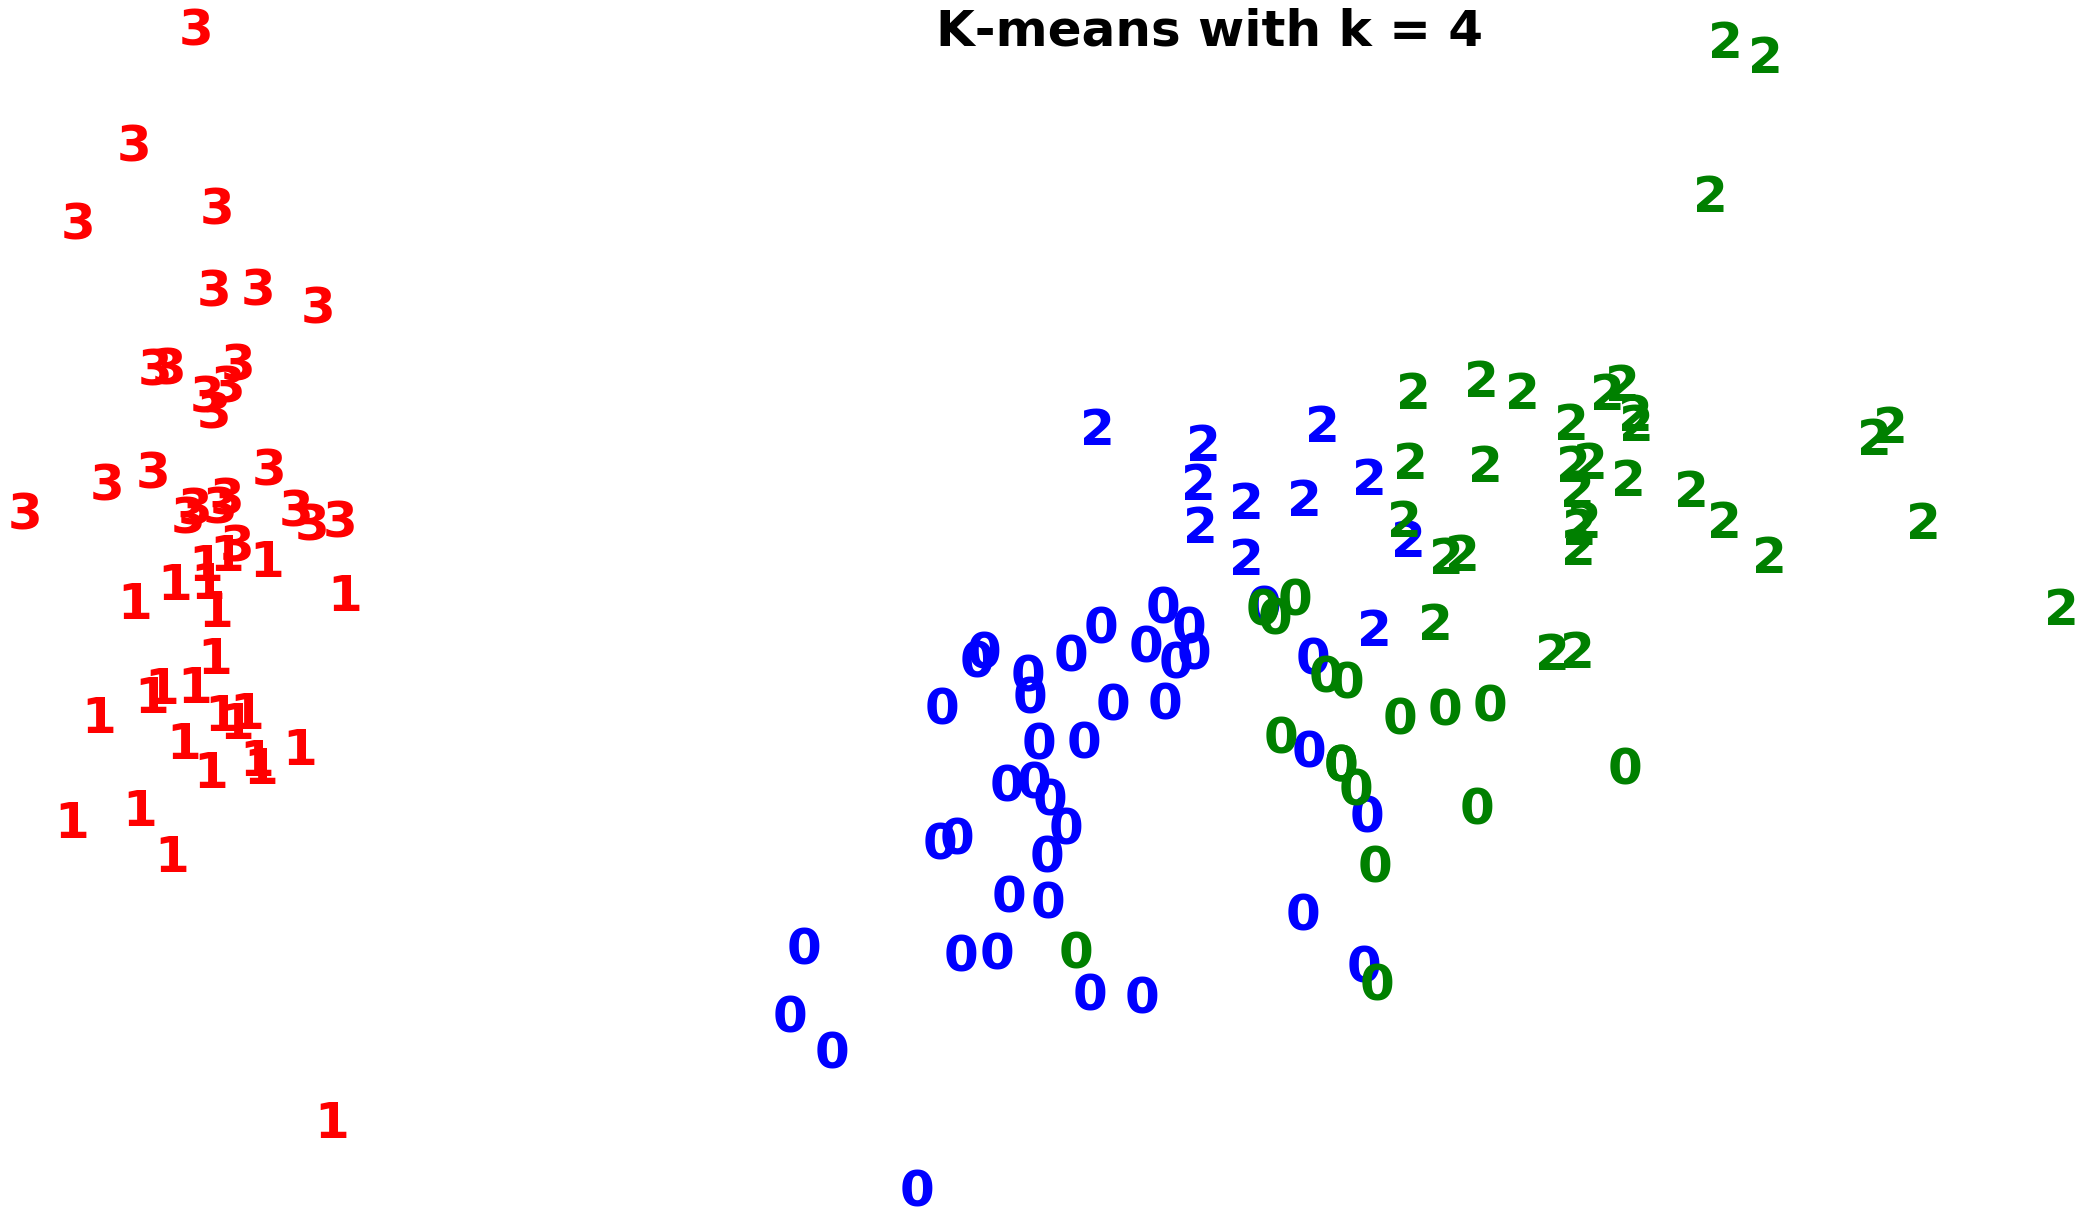

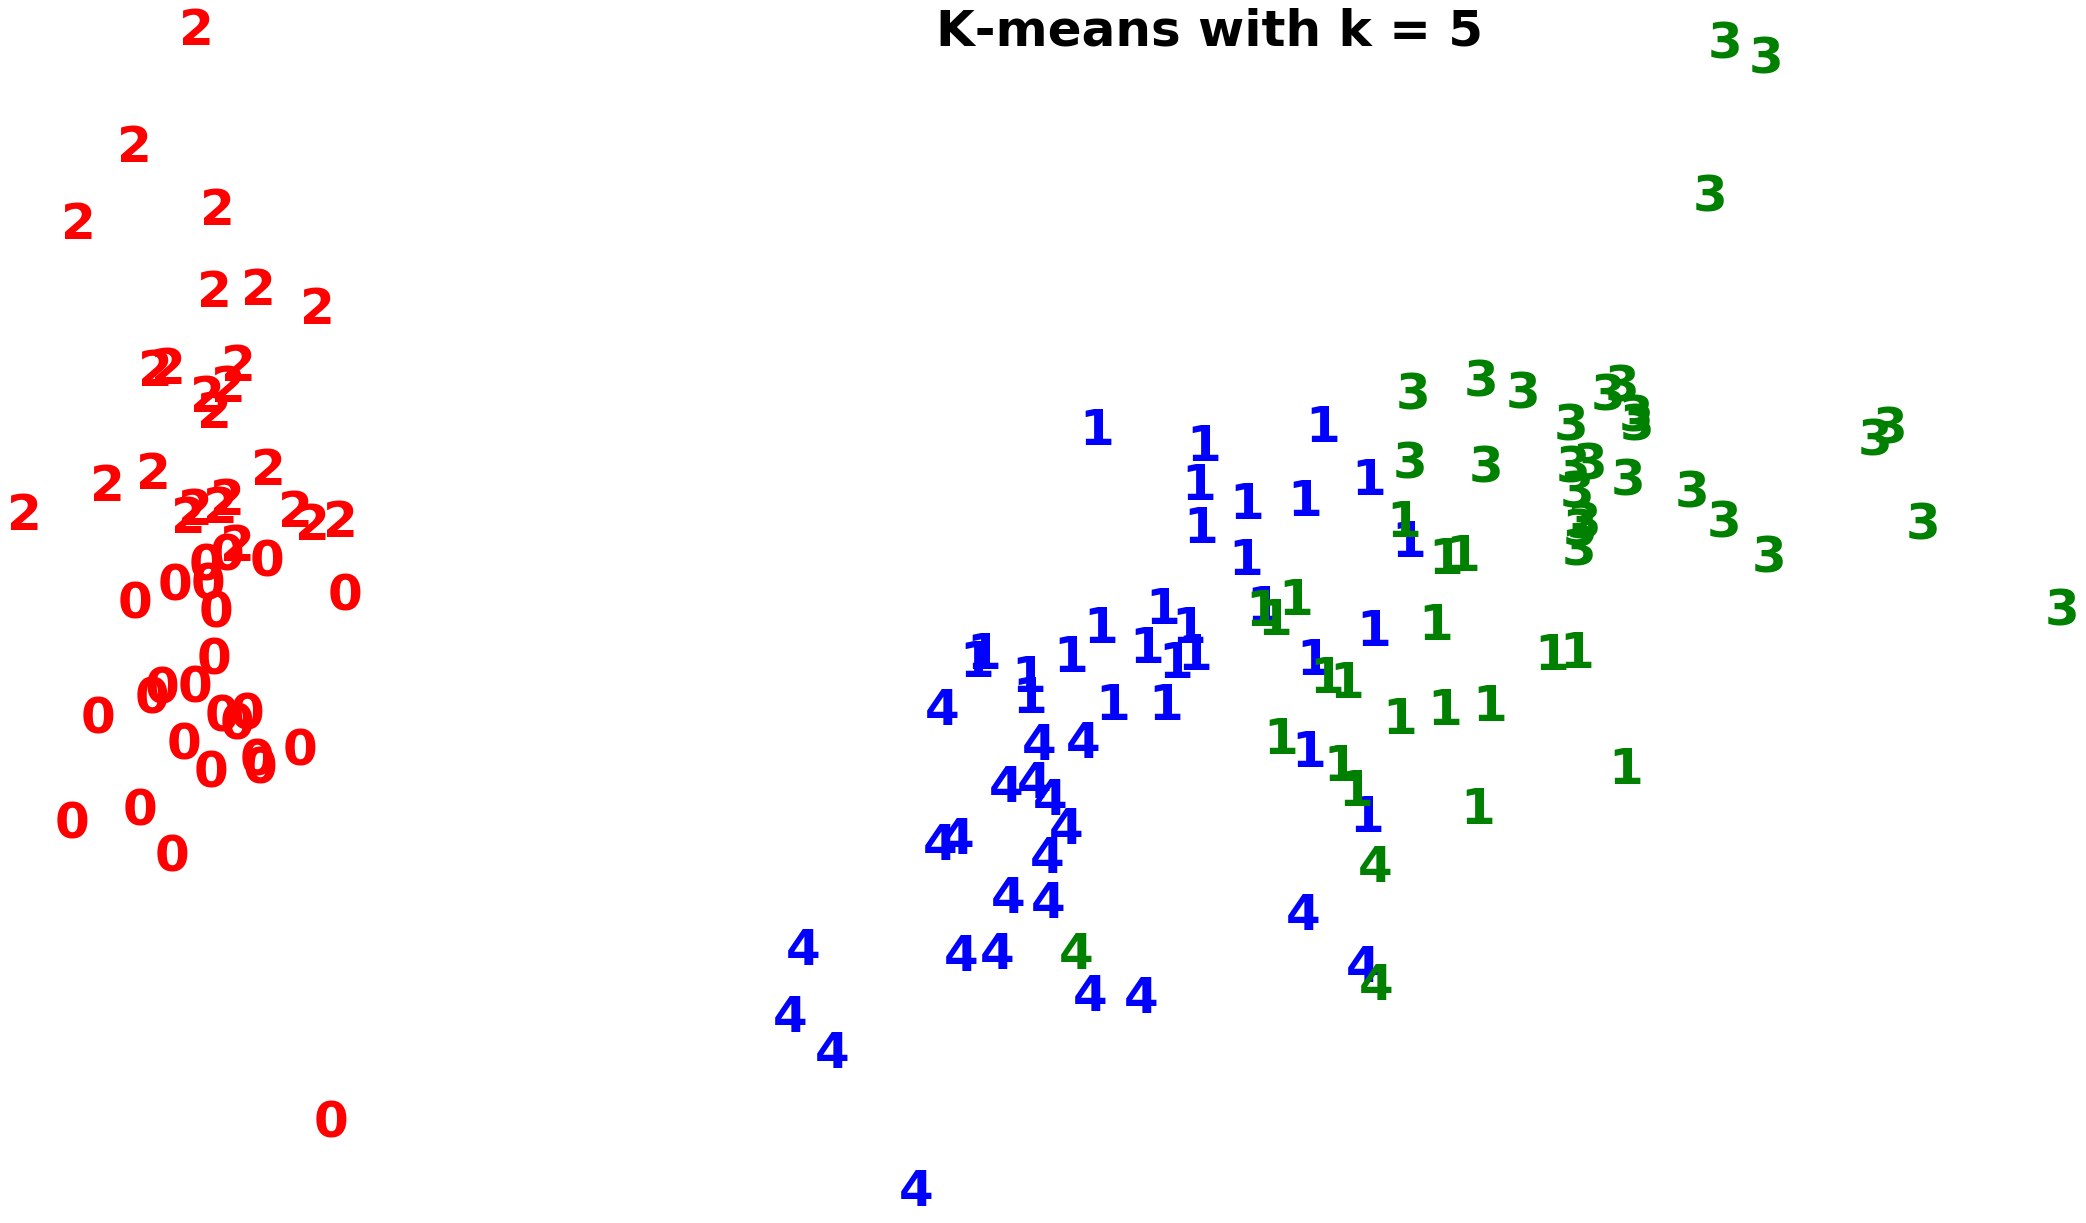

<IPython.core.display.Javascript object>

In [13]:
pca = PCA(n_components=2).fit_transform(X_std)
plt.figure(figsize=(10, 5))
colours = "rbg"
for i, solution in enumerate(kmean_cluster):
    plt.text(
        np.mean(pca[:, 0]),
        np.max(pca[:, 1]),
        "K-means with k = {}".format(cluster[i]),
        fontdict={"weight": "bold", "size": 50},
    )
    for i in range(pca.shape[0]):
        plt.text(
            pca[i, 0],
            pca[i, 1],
            str(solution[i]),
            color=colours[y[i]],
            fontdict={"weight": "bold", "size": 50},
        )

    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.show()

### Heart Disease Dataset

In [15]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "heartdisease"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)
heartdisease_df = pd.read_sql_query("select * from heartdisease", con=engine)

engine.dispose()

<IPython.core.display.Javascript object>

In [16]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace="?", value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

<IPython.core.display.Javascript object>

In [20]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

In [21]:
X_pca = PCA(n_components=2).fit_transform(X_std)
y_pred = KMeans(n_clusters=2, random_state=13).fit_predict(X_std)

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(*args, **kw)>

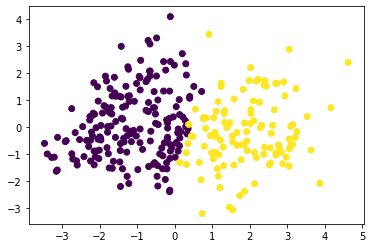

<IPython.core.display.Javascript object>

In [22]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show

In [23]:
print(pd.crosstab(y_pred,y))

col_0    0    1
row_0          
0       38  151
1      101   13


<IPython.core.display.Javascript object>